<a href="https://colab.research.google.com/github/aastha2003gupta/music_genre_classification/blob/main/IndianMusic_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies



In [ ]:
import json
import os
import math
import numpy as np
import librosa
from sklearn.model_selection import train_test_split

# Loading dataset
Loading indian music dataset from kaggle

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d winchester19/indian-music-genre-dataset


 98% 303M/309M [00:02<00:00, 158MB/s]
100% 309M/309M [00:02<00:00, 118MB/s]


In [ ]:
!unzip -q indian-music-genre-dataset.zip -d /content/data


In [ ]:
json_file_path = 'data.json'

In [ ]:
dataset_path='/content/data/genrenew'

# Specifying metrics
The sample rate determines how finely the audio signal is sampled, and the track duration defines the length of the audio segment that will be considered for analysis or classification. The total number of samples (SAMPLES_PER_TRACK) is a key parameter for any signal processing or machine learning task involving audio, as it defines the input size or length of the audio data sequence that will be used in the classification model.

In [ ]:
SAMPLE_RATE = 22050
TRACK_DURATION = 45 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

# Processing data
Save_mfcc function extracts Mel-frequency cepstral coefficients (MFCCs) from audio files in a dataset, storing the data and labels in a JSON file. It uses the librosa library for audio processing and considers parameters such as the number of MFCCs, Fourier transform block size, and segment duration. The function iterates through the dataset, processes audio files in segments, and saves the extracted features and labels to a JSON file. The script demonstrates the function's usage by calling it with default parameters, including 10 segments per audio file.

In [ ]:
def save_mfcc(dataset_path, json_file_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_file_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(dataset_path, json_file_path, num_segments=10)


Processing: carnatic
/content/data/genrenew/carnatic/ca10.mp3, segment:1
/content/data/genrenew/carnatic/ca10.mp3, segment:2
/content/data/genrenew/carnatic/ca10.mp3, segment:3
/content/data/genrenew/carnatic/ca10.mp3, segment:4
/content/data/genrenew/carnatic/ca10.mp3, segment:5
/content/data/genrenew/carnatic/ca10.mp3, segment:6
/content/data/genrenew/carnatic/ca10.mp3, segment:7
/content/data/genrenew/carnatic/ca10.mp3, segment:8
/content/data/genrenew/carnatic/ca10.mp3, segment:9
/content/data/genrenew/carnatic/ca10.mp3, segment:10
/content/data/genrenew/carnatic/ca52.mp3, segment:1
/content/data/genrenew/carnatic/ca52.mp3, segment:2
/content/data/genrenew/carnatic/ca52.mp3, segment:3
/content/data/genrenew/carnatic/ca52.mp3, segment:4
/content/data/genrenew/carnatic/ca52.mp3, segment:5
/content/data/genrenew/carnatic/ca52.mp3, segment:6
/content/data/genrenew/carnatic/ca52.mp3, segment:7
/content/data/genrenew/carnatic/ca52.mp3, segment:8
/content/data/genrenew/carnatic/ca52.mp3,

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


/content/data/genrenew/semiclassical/scl90.mp3, segment:1
/content/data/genrenew/semiclassical/scl90.mp3, segment:2
/content/data/genrenew/semiclassical/scl90.mp3, segment:3
/content/data/genrenew/semiclassical/scl90.mp3, segment:4
/content/data/genrenew/semiclassical/scl90.mp3, segment:5
/content/data/genrenew/semiclassical/scl90.mp3, segment:6
/content/data/genrenew/semiclassical/scl90.mp3, segment:7
/content/data/genrenew/semiclassical/scl90.mp3, segment:8
/content/data/genrenew/semiclassical/scl90.mp3, segment:9
/content/data/genrenew/semiclassical/scl90.mp3, segment:10
/content/data/genrenew/semiclassical/scl39.mp3, segment:1
/content/data/genrenew/semiclassical/scl39.mp3, segment:2
/content/data/genrenew/semiclassical/scl39.mp3, segment:3
/content/data/genrenew/semiclassical/scl39.mp3, segment:4
/content/data/genrenew/semiclassical/scl39.mp3, segment:5
/content/data/genrenew/semiclassical/scl39.mp3, segment:6
/content/data/genrenew/semiclassical/scl39.mp3, segment:7
/content/data

# Loading data from the json file
The load_data loads data from a JSON file specified by data_path. The function reads the MFCCs and corresponding labels from the JSON file and returns them as NumPy arrays x and y, respectively. Finally, it prints a message indicating that the data has been successfully loaded. Note that the function assumes the existence of the json library and NumPy (np) has to be imported before using this code.

In [ ]:
data_path='/content/data.json'

In [ ]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    x = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data loaded")

    return  x, y

# Splitting into train and test data
The prepare_datasets function loads data using the load_data function, then splits it into training, validation, and test sets using scikit-learn's train_test_split. The test_size parameter determines the test set proportion, and validation_size determines the validation set proportion from the training set. The function returns the resulting sets of input features (x_train, x_validation, x_test) and labels (y_train, y_validation, y_test) for machine learning model training and evaluation.





In [ ]:
def prepare_datasets(test_size, validation_size):
    x, y = load_data(data_path)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size)

    return x_train, x_validation, x_test, y_train, y_validation, y_test

# Model Building

The build_model function creates a sequential neural network with two LSTM layers (64 units each), followed by a dense layer with 64 units and ReLU activation. A dropout layer with a rate of 0.3 is included to prevent overfitting. The final layer consists of 10 units with a softmax activation, making it suitable for a classification task with 10 classes. The function returns the configured model, designed for processing input data with the specified shape for sequence-based tasks.

In [ ]:
import tensorflow.keras as keras

In [ ]:
def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [ ]:
x_train, x_validation, x_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

Data loaded


In [ ]:
input_shape = (x_train.shape[1], x_train.shape[2])
model = build_model(input_shape)

The **` compilation step `** for the neural network model. It specifies the Adam optimizer with a learning rate of 0.0001, uses the sparse categorical crossentropy as the loss function (suitable for integer-encoded class labels), and monitors accuracy as the evaluation metric. The compilation is a necessary step before training the model, as it configures the learning process by specifying the optimization algorithm, loss function, and metrics.

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
#print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 194, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57802 (225.79 KB)
Trainable params: 57802 (225.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model training
 Training the neural network model (model) using the training data (x_train and y_train) for 50 epochs. It also specifies the validation data (x_test and y_test) for monitoring the model's performance on a separate set during training. The training is done in batches of size 32. The training history, including information about the training and validation loss and accuracy at each epoch, is stored in the history variable. This information can be useful for analyzing the model's learning progress over time.

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=32, epochs=50)


Epoch 1/50
94/94 [==============================] - 2s 20ms/step - loss: 0.7430 - accuracy: 0.7227 - val_loss: 0.8582 - val_accuracy: 0.6720
Epoch 2/50
94/94 [==============================] - 2s 19ms/step - loss: 0.8000 - accuracy: 0.6987 - val_loss: 0.8685 - val_accuracy: 0.6587
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 0.7502 - accuracy: 0.7271 - val_loss: 0.8771 - val_accuracy: 0.6453
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.7499 - accuracy: 0.7227 - val_loss: 0.8385 - val_accuracy: 0.6600
Epoch 5/50
94/94 [==============================] - 2s 22ms/step - loss: 0.7180 - accuracy: 0.7364 - val_loss: 0.8484 - val_accuracy: 0.6547
Epoch 6/50
94/94 [==============================] - 2s 25ms/step - loss: 0.7180 - accuracy: 0.7421 - val_loss: 0.8717 - val_accuracy: 0.6653
Epoch 7/50
94/94 [==============================] - 2s 16ms/step - loss: 0.7286 - accuracy: 0.7251 - val_loss: 0.8129 - val_accuracy: 0.6733
Epoch 8/50
94

# Plot model
A function plot_history that visualizes the training and validation performance of a neural network model over epochs. It creates a two-subplot figure using matplotlib, where the first subplot displays accuracy (training and validation), and the second subplot displays error (training and validation). The function is designed to take a training history object as input, including accuracy and error information at each epoch. This visualization helps analyze the model's learning progress and generalization on both training and validation datasets.

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

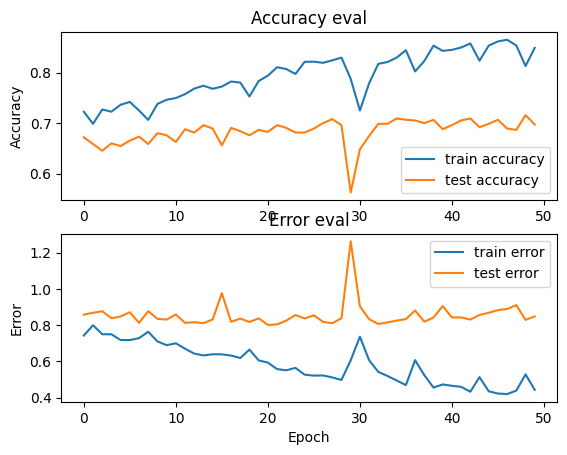

In [ ]:
plot_history(history)

# Making Predictions

**Test accuracy calculation**
 It computes the test loss and accuracy using the evaluate method. The results are then printed, displaying the test accuracy. The verbose=2 argument indicates that the evaluation progress will be displayed in a more detailed mode. This step provides an assessment of the model's performance on unseen data, helping to gauge its effectiveness in generalizing to new examples.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



40/40 - 0s - loss: 0.8993 - accuracy: 0.6829 - 491ms/epoch - 12ms/step

Test accuracy: 0.6829463839530945


# **Prediction**
The predict function takes a trained neural network model, input data, and target label. It predicts the label using the model, retrieves the predicted genre label from a predefined mapping (class_index_to_genre), and prints both the target label and the predicted genre. This function enhances interpretability by associating numerical predictions with human-readable genre labels.

In [ ]:
class_index_to_genre = {0: 'Sufi', 1: 'Ghazal', 2: 'Carnatic', 3: 'Bollypop', 4: 'Semi Classical'}
def predict(model, x, y):

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    x = x[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(x)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    predicted_genre=class_index_to_genre.get(predicted_index[0])

    print("Target: {}, Predicted label: {}".format(y, predicted_index))
    print(predicted_genre)

In [ ]:
# pick a sample to predict from the test set
x_to_predict = x_test[10]
y_to_predict = y_test[10]

# predict sample
predict(model, x_to_predict, y_to_predict)

1/1 [==============================] - 0s 21ms/step
Target: 0, Predicted label: [0]
Sufi
